In [2]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
# read data into a DataFrame
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


####  **features**
##### - TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
##### - Radio: advertising dollars spent on Radio
##### - Newspaper: advertising dollars spent on Newspaper
#### **response**
##### - Sales: sales of a single product in a given market (in thousands of widgets)


In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

/Users/andang/miniconda3/envs/MLcoban/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


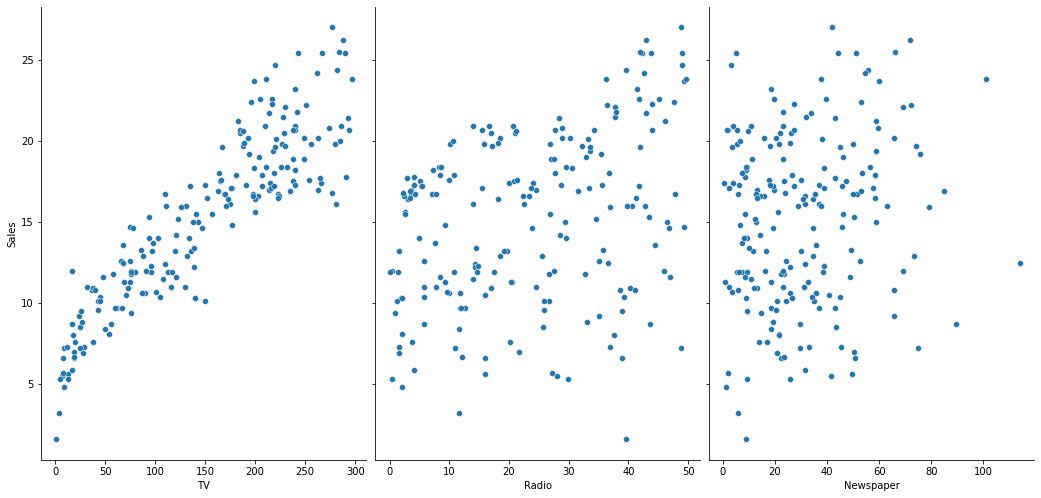

In [5]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

In [6]:
# a. Is there a relationship between ads and sales?
# b. How strong is that relationship?
# c. Which ad types contribute to sales?
# d. What is the effect of each ad type of sales?
# e. Given ad spending in a particular market, can sales be predicted?

In [7]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    6.974821
TV           0.055465
dtype: float64

In [8]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print ("iNTERCEPT : ",lm2.intercept_)
print ("CO-EFFICIENT : ",lm2.coef_)

iNTERCEPT :  6.974821488229891
CO-EFFICIENT :  [0.05546477]


# Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?
# $$y = \beta_0 + \beta_1x$$
# $$y = 6.974821 + 0.05546477 \times 50$$


In [10]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.74806
dtype: float64

In [12]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict([[50]])

array([9.74806001])

/Users/andang/miniconda3/envs/MLcoban/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


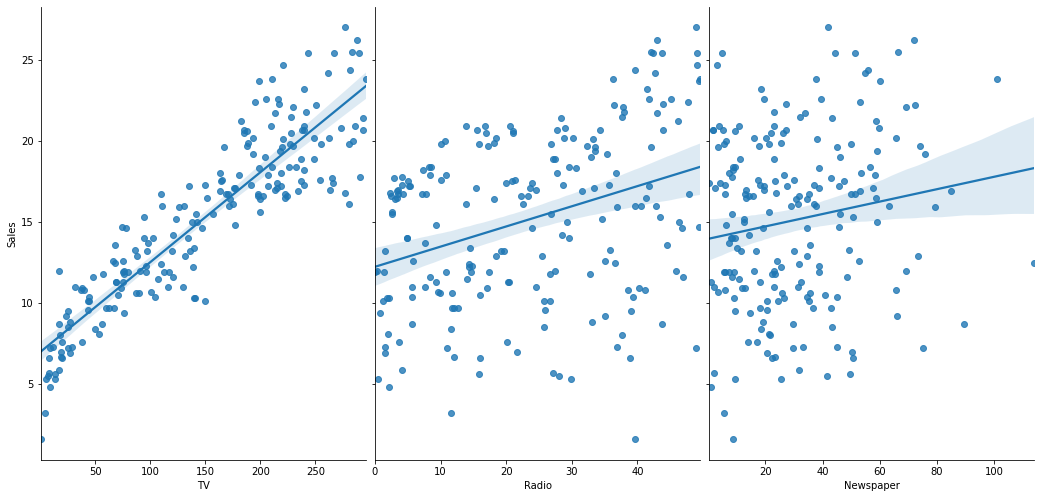

In [14]:
# ## Plotting the Least Squares Line
# Let's plot the least squares line for Sales versus each of the features:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [16]:
### STATSMODELS ###

# print the p-values for the model coefficients
print(lm1.pvalues)

# A **p-value less than 0.05** is one way to decide whether there is likely a relationship between the feature and the response.
# 
# In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.
# 
# we generally don't consider the p-value for the intercept.

# ## How Well Does the Model Fit the data?
# 
# The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model.
# 
# R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

# ![R-squared](r_squared.png)

# You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). 
# 
# Now calculating the R-squared value for our simple linear model:

### STATSMODELS ###
# print the R-squared value for the model
print("StatModel R-Square Value",lm1.rsquared)
### SCIKIT-LEARN ###
# print the R-squared value for the model
print("SkLearn R-Square Value",lm2.score(X, y))

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64
StatModel R-Square Value 0.8121757029987414
SkLearn R-Square Value 0.8121757029987414


### Multiple Linear Regression

# Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:
# $y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$
# Each $x$ represents a different feature, and each feature has its own coefficient. In this case:
# $y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [18]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
# print the coefficients
print(lm1.params)
print('*'*50)
### SCIKIT-LEARN ###
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print (lm2.intercept_)
print (lm2.coef_)

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64
**************************************************
4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [19]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print ("mean_absolute_error :",metrics.mean_absolute_error(y_true, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_true, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

mean_absolute_error : 10.0
mean_squared_error :  150.0
root_mean_squared_error :  12.24744871391589


### MSE is more popular than MAE because MSE "eliminates" larger errors. But, RMSE is even more better than MSE because RMSE is interpretable in the "y" units.

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(lm2, data, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [1. 1. 1. 1. 1. 1.]


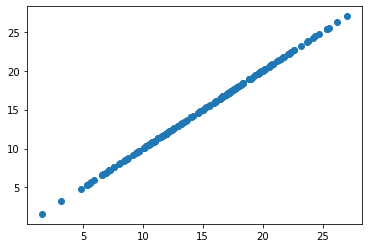

In [21]:
import matplotlib.pyplot as plt
predictions = cross_val_predict(lm2, data, y, cv=6)
plt.scatter(y, predictions)